# Gradient Descent (最急降下法)

前回までで単回帰， 重回帰を最小２乗法と一緒に取り扱ってきたので，今回からは最急降下法を取り扱っていきます．  
最急降下法は最小２乗法とおなじようにパラメータの最適解を探索するときに用いるものだということを取り敢えず覚えておいてください．  

今回はIris-datasetsという3種類のアヤメの花びらとがくそれぞれの長さと幅を記録したデータセットをつかって，分類します  
あまり数式は出さずにグラフいっぱいで行くのでよろしくお願いします！！！

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
iris = pd.read_csv('data/iris.data',
                 names=["sepal length", "sepal width", "petal length","petal width", "class"])
iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


![iris](data/iris.png)
こちらがこのデータセットで登場するアヤメ3種類で，"sepal"はがくで"petal"は花びらだそうです．単位はcmです．  
今回は可視化しやすいように変数を2つに絞るのでそれぞれの相関を見ましょう．

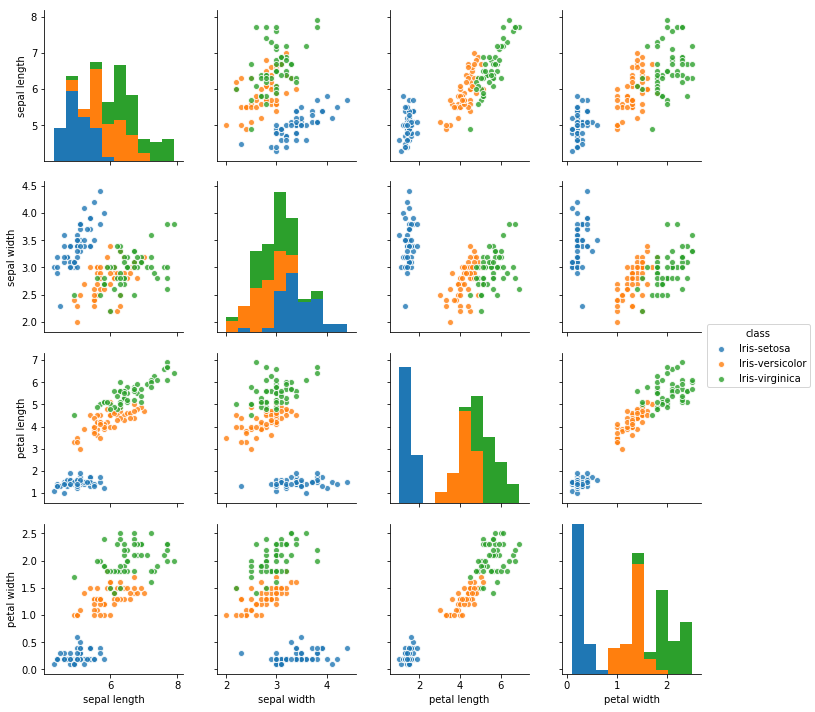

In [3]:
sns.pairplot(iris, hue="class", plot_kws={'alpha': 0.8} )

いまから上の散布図に2本の直線を引くことで3種類のアヤメを分類していきたいので，それに適切そうなものをこの中から選んで2変数とします．  
ですので今回はpetal lengthとpetal widthが一番綺麗に分かれてそうなのでこの2変数を使うことにします．  

使う変数が決まったので以下の手順でデータの前処理をします．
1. 不要な変数を削除
1. 説明変数と目的変数で分割
1. 目的変数を0, 1に置換
1. 学習データとテストデータに分割


In [4]:
# 不要な変数を削除
data = iris.iloc[:, iris.columns != "sepal length"]
data = data.iloc[:, data.columns != "sepal width"]
#data = iris
data.head()

,petal length,petal width,class
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa


In [5]:
# 説明変数と目的変数で分割
X = data.iloc[:, data.columns != "class"]
y = data.iloc[:, data.columns == "class"]
X.head()

,petal length,petal width
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [6]:
y.head()

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [7]:
y = iris["class"]
y = pd.DataFrame({'setosa': (y == 'Iris-setosa').astype(float),
                  'versicolor': (y == 'Iris-versicolor').astype(float),
                  'virginica': (y == 'Iris-virginica').astype(float)})
y.head()

,setosa,versicolor,virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [12]:
# 学習データとテストデータで分割
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

shuffle(X, y, random_state=0)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

In [21]:
from src.logistic_regression import MultipleLogisticRegressioniClassifier

In [22]:
clf = MultipleLogisticRegressioniClassifier()

In [23]:
clf.init_state = True
clf.fit(X_train, y_train, X_test, y_test, lr=0.1, steps=600, history=False, verbose=False)

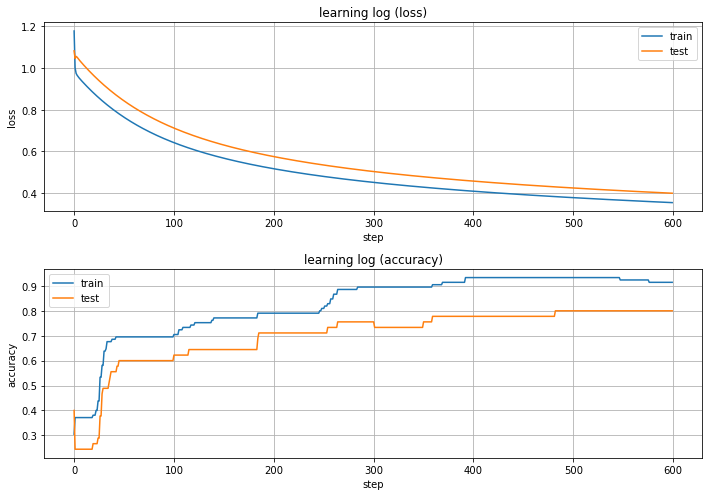

In [24]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 7))
plt.subplot(211)
plt.title("learning log (loss)")
plt.xlabel("step")
plt.ylabel("loss")
plt.plot(np.arange(len(clf.loss)), clf.loss, label="train")
plt.plot(np.arange(len(clf.loss)), clf.val_loss, label="test")
plt.legend(loc="best")
plt.grid(True)

plt.subplot(212)
plt.title("learning log (accuracy)")
plt.xlabel("step")
plt.ylabel("accuracy")
plt.plot(np.arange(len(clf.loss)), clf.acc, label="train")
plt.plot(np.arange(len(clf.loss)), clf.val_acc, label="test")
plt.legend(loc="best")
plt.grid(True)

plt.tight_layout()
plt.show()